# [CRQ2] Visualize movements and passes on the pitch!

Here we will focus our attention on the ares that a player covers during a match. In fact, for each event of the 'events' dataframe, we have a pair of coordinates that represent the starting point and the end point of an action.

This task is divided into 2 different types of visualizations, an heat map and a heat and arrow map.

### 1. Cristiano Ronaldo vs Leonél Messi

Here, we will cover only the match Barcelona - Real Madrid played on the 6 May 2018.

In [76]:
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

Let's define some functions that we will use later.

In [77]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)  

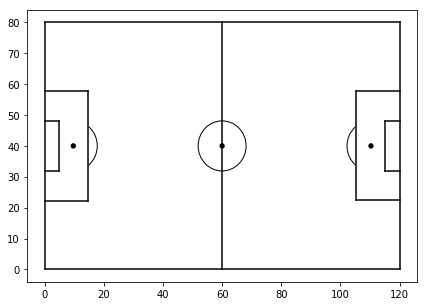

In [78]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [79]:
#Function to plot the heat map
def green(d):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    x_coord = [i[0]['x'] for i in d["positions"]]#Coordinate of player starting position
    y_coord = [i[0]['y'] for i in d["positions"]]
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30);

In [80]:
#We define the tagg function, that will create a list of all the numbers associate with 'id'
def tagg(x):
    v = []
    for i in range(len(x)):
        v.append(x.iloc[i])
    for i in range(len(v)):
        v[i] = [d['id'] for d in v[i]]
    return v

In [81]:
#Function to plot the heat map with the arrow map in the second part of the task
def calcio(d, v):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)#We draw the field
    plt.axis('off')#We get rid of axis
    
    #These are the starting positions we need for the heat map
    x_coord = [i[0]['x'] for i in d["positions"]]
    y_coord = [i[0]['y'] for i in d["positions"]]

    for i in range(len(d)):
        # can also differentiate by color
        color = 'blue' if 1801 in v[i] else 'red'#red if pass is inaccurate
        #We print the arrows,using the start and the end positions of each event
        ax.annotate("", xy = (d.iloc[i]['positions'][1]['x'], d.iloc[i]['positions'][1]['y']), xycoords = 'data',
                   xytext = (d.iloc[i]['positions'][0]['x'], d.iloc[i]['positions'][0]['y']), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    #This print the heat map
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    return plt.show()
    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos


Let's start opening the json files and creating the dataframes that we need.

In [82]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\players.json', 'r') as myfile:
    data = myfile.read()
p = json.loads(data)
players = pd.DataFrame(p)


In [83]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Spain.json', 'r') as myfile:
    data = myfile.read()
m = json.loads(data)
Spain = pd.DataFrame(m)


In [84]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Spain.json', 'r') as myfile:
    data = myfile.read()
e = json.loads(data)
events = pd.DataFrame(e)


Now, we search for the players that we need: Cristiano Ronaldo and Leonél Messi.


In [85]:
players.loc[players['firstName'] == 'Cristiano Ronaldo']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",1985-02-05,9905,3159,Cristiano Ronaldo,right,187,dos Santos Aveiro,,"{'name': 'Portugal', 'id': '620', 'alpha3code'...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Cristiano Ronaldo,83,3322


In [86]:
players.loc[players['lastName'] == 'Messi Cuccittini']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
207,"{'name': 'Argentina', 'id': '32', 'alpha3code'...",1987-06-24,12274,676,Lionel Andr\u00e9s,left,170,Messi Cuccittini,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",L. Messi,72,3359


#### Let's start analyzing Cristiano Ronaldo

These are all of the Ronaldo's actions during the La Liga season.

In [87]:
criact = events.loc[events['playerId'] == 3322]
criact.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
76412,1,Duel,28.108732,189337977,2565596,1H,3322,"[{'y': 26, 'x': 96}, {'y': 27, 'x': 91}]",11,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",675
76414,10,Shot,31.052085,189337978,2565596,1H,3322,"[{'y': 27, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...",675
76457,8,Pass,146.902499,189338004,2565596,1H,3322,"[{'y': 53, 'x': 68}, {'y': 67, 'x': 53}]",85,Simple pass,[{'id': 1801}],675
76589,10,Shot,548.744061,189338889,2565596,1H,3322,"[{'y': 48, 'x': 96}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",675
76654,1,Duel,713.899672,189338224,2565596,1H,3322,"[{'y': 84, 'x': 62}, {'y': 81, 'x': 42}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",675


In [88]:
criact['eventName'].unique()

array(['Duel', 'Shot', 'Pass', 'Others on the ball', 'Foul', 'Free Kick',
       'Offside'], dtype=object)

#### Now, we consider only the 'eventName' values that we need

So, we search for: 'Duel', 'Shot', 'Pass' and 'Free Kick'.

In [89]:
a = pd.concat([criact.loc[criact['eventName'] == 'Duel'], criact.loc[criact['eventName'] == 'Shot'], criact.loc[criact['eventName'] == 'Pass'], criact.loc[criact['eventName'] == 'Free Kick']])

In [90]:
b = a.loc[a['matchId'] == 2565907]#Choosing the right match
b = b.reset_index(drop=True)#reindexing
b.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,68.618689,249644112,2565907,1H,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",13,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",675
1,1,Duel,69.411334,249644113,2565907,1H,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",675
2,1,Duel,114.548692,249644119,2565907,1H,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",12,Ground defending duel,"[{'id': 701}, {'id': 1802}]",675
3,1,Duel,275.327960,249644145,2565907,1H,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675
4,1,Duel,403.870069,249644178,2565907,1H,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675


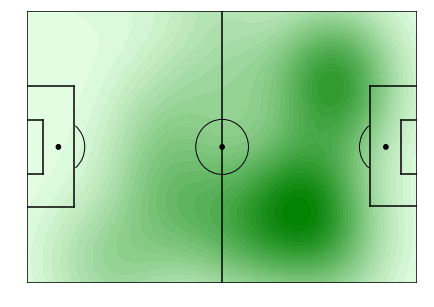

In [91]:
green(b)

#### Let's do the same analysis on Leonél Messi

In [92]:
messact = events.loc[events['playerId'] == 3359]


In [93]:
m = pd.concat([messact.loc[messact['eventName'] == 'Duel'], messact.loc[messact['eventName'] == 'Shot'], messact.loc[messact['eventName'] == 'Pass'], messact.loc[messact['eventName'] == 'Free Kick']])

In [94]:
rb = m.loc[m['matchId'] == 2565907]
rb = rb.reset_index(drop=True)
rb.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,122.168204,249644589,2565907,1H,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",11,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",676
1,1,Duel,294.661951,249644634,2565907,1H,3359,"[{'y': 57, 'x': 36}, {'y': 60, 'x': 34}]",13,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",676
2,1,Duel,429.449101,249644663,2565907,1H,3359,"[{'y': 62, 'x': 42}, {'y': 57, 'x': 36}]",11,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",676
3,1,Duel,432.507881,249644665,2565907,1H,3359,"[{'y': 69, 'x': 37}, {'y': 66, 'x': 41}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",676
4,1,Duel,693.128014,249644730,2565907,1H,3359,"[{'y': 43, 'x': 44}, {'y': 33, 'x': 35}]",13,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",676


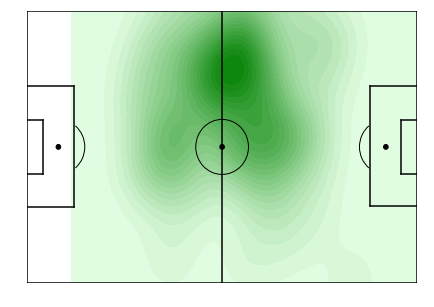

In [95]:
green(rb)

### Comments

By looking at the two plots, there are clearly strong differences:
1. Cristiano Ronaldo has been particularly active in two zones of the field, right outside the main area. Instead, Messi has only focused his game into the upper midfield, a small and less dengerous place, during the match.
2. Cristiano Ronaldo has been moving all around the field, reaching areas outiside his main zones.

This means that the defense of the Real Madrid was able to limit the movements of Messi and relegate him to a small area of the field, instead Cristiano Ronaldo, maybe thanks to his strenght and physique, has been a tough opponent for the Barcelona defence, but they manage to keep him outside the main area.


### 2. Miralem Pjanic vs Jorginho
Let's start creating the Italy dataset, since Juventus and Napoli are two teams of Serie A.

In [96]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Italy.json', 'r') as myfile:
    data = myfile.read()
i = json.loads(data)
Italy = pd.DataFrame(i)
Italy.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329
3,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",,3165,2576330
4,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",,3163,2576331


We need the wyId code to find this match even in 'events' dataset, to choose the players actions of the right match.

In [97]:
Italy.loc[Italy['label'] == 'Juventus - Napoli, 0 - 1']

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
41,524,"April 22, 2018 at 8:45:00 PM GMT+2",2018-04-22 18:45:00,Regular,34,"Juventus - Napoli, 0 - 1","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",,3187,2576295


The match Juventus - Napoli has wyId: 2576295

#### Miralem Pjanic plot of passes

Now we can search for the player Miralem Pjanic in the 'players' dataset, we need his wyId code.

In [98]:
pia = players.loc[players['firstName'] == 'Miralem']
pia

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1482,"{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",1990-04-02,null,3159,Miralem,right,180,Pjani\u0107,,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Pjani\u0107,74,20443


#### Making the heat-arrow plot

In [99]:
#Opening and loading the json file 'events_Italy'
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Italy.json', 'r') as myfile:
    data = myfile.read()
evit = json.loads(data)
Itaev = pd.DataFrame(evit)#Creating a pandas dataframe

In [100]:
#These are all the passes of Pjanic during the match
Pjanic = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 20443) & (Itaev['eventName'] == 'Pass')]
Pjanic.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
573220,8,Pass,352.941005,245487509,2576295,1H,20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",85,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",3159
573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159


In this visualization, we will plot the heat map and the arrow map concurrently, highlightning the accurate passes and the inaccurate ones.

In [101]:
tag = Pjanic['tags']#This is the 'tags' column that we will transform into a list of values
tag.head()

573105                                [{'id': 1801}]
573107                                [{'id': 1801}]
573126                  [{'id': 1401}, {'id': 1801}]
573220    [{'id': 1401}, {'id': 1001}, {'id': 1802}]
573225                                [{'id': 1801}]
Name: tags, dtype: object

In [102]:
v = tagg(tag)
v[:5]

[[1801], [1801], [1401, 1801], [1401, 1001, 1802], [1801]]

Now, we can verify if a pass has been accurate or not by looking at the tag number 1801 for each event.

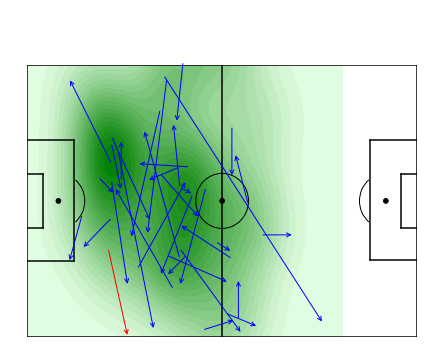

In [103]:
calcio(Pjanic,v)

#### Jorginho plot of passes

In [104]:
jor = players.loc[players['firstName'] == 'Jorge Luiz'] #Searching for the wyId code of the player
jor

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1658,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1991-12-20,3757,3187,Jorge Luiz,right,180,Frello Filho,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


In [105]:
#Choosing only the event 'Pass'
Jorginho = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 21315) & (Itaev['eventName'] == 'Pass')]
Jorginho.head() 

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573145,8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187
573164,8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187
573188,8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187
573231,8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187
573237,8,Pass,456.587989,245487506,2576295,1H,21315,"[{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]",85,Simple pass,[{'id': 1801}],3187


In [106]:
tagj = Jorginho['tags']
tagj.head()

573145                  [{'id': 1801}]
573164    [{'id': 1401}, {'id': 1802}]
573188                  [{'id': 1801}]
573231                  [{'id': 1801}]
573237                  [{'id': 1801}]
Name: tags, dtype: object

In [107]:
w = tagg(tagj)
w[:5]

[[1801], [1401, 1802], [1801], [1801], [1801]]

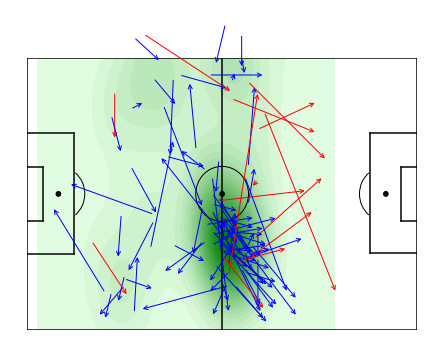

In [108]:
calcio(Jorginho,w)

### Comments

By looking at the heat maps, we can clearly notice that even if both are midfielders, Jorginho is in a much more advanced position than Pjanic. The difference in the number of passes between the two players is once again on Jorginho's side, even though Pjanic manages to overcome it in terms of precision, with only one inaccurate pass. However, all the inaccurate passages of Jorginho are at least towards the attack area, while Pjanhic not only never approached there, but none of his passages seems to be able to reach the area. So, going to look at the game statistics linked to the track of this exercise, we observe a 60% possession of Napoli, and one of 40% of Juventus, therefore, since the victory belongs to Napoli, perhaps it would have been better to concentrate on the quantity of forward passes, and not just on their accuracy.